In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Do a descriptive analysis of all the variables.

In [3]:
#reading data
data=pd.read_csv(r"C:\Users\dell\Calculating-credit-worthiness-for-rural-India\data\trainingData .csv")
data.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [4]:
data.shape

(40000, 21)

In [5]:
data.columns

Index(['Id', 'city', 'age', 'sex', 'social_class', 'primary_business',
       'secondary_business', 'annual_income', 'monthly_expenses',
       'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house',
       'occupants_count', 'house_area', 'sanitary_availability',
       'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments',
       'loan_amount'],
      dtype='object')

In [6]:
#Calculating missing value 
data.isnull().sum()

Id                          0
city                     1864
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [7]:
#Calculating missing value in percentage
(data.isnull().sum()/40000)*100

Id                        0.0000
city                      4.6600
age                       0.0000
sex                       0.0000
social_class             13.1375
primary_business          0.0650
secondary_business       13.1025
annual_income             0.0000
monthly_expenses          0.3000
old_dependents            0.0000
young_dependents          0.0000
home_ownership            0.9475
type_of_house             1.7350
occupants_count           0.0000
house_area                0.0000
sanitary_availability     0.5200
water_availabity         13.1325
loan_purpose              0.0650
loan_tenure               0.0000
loan_installments         0.0000
loan_amount               0.0000
dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40000 non-null  int64  
 1   city                   38136 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           34745 non-null  object 
 5   primary_business       39974 non-null  object 
 6   secondary_business     34759 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       39880 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         39621 non-null  float64
 12  type_of_house          39306 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa

In [9]:
data.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,40000.00000,40000.00000,4.000000e+04,39880.000000,40000.000000,40000.00000,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000,40000.000000,40000.000000,4.000000e+04
mean,20000.50000,55.15990,3.764021e+04,3810.875401,0.044900,1.13710,0.972489,26.641000,552.804750,0.686369,0.753216,12.032225,21.761175,8.412593e+03
std,11547.14972,3830.35566,2.873912e+04,4592.958009,0.222003,1.07384,0.163568,4749.995485,4596.921905,0.464028,0.255337,1.367473,16.682458,1.359694e+04
min,1.00000,2.00000,0.000000e+00,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10000.75000,29.00000,1.440000e+04,2500.000000,0.000000,0.00000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20000.50000,35.00000,3.600000e+04,3500.000000,0.000000,1.00000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30000.25000,42.00000,5.600000e+04,4000.000000,0.000000,2.00000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.00000,766105.00000,1.200000e+06,240000.000000,3.000000,7.00000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


# Correlation Matrix


In [10]:
'''orrelation=data.corr()
correlation.head()'''

'orrelation=data.corr()\ncorrelation.head()'

In [11]:
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()
print(correlation.head())

                        Id       age  annual_income  monthly_expenses  \
Id                1.000000 -0.004114       0.472447         -0.021413   
age              -0.004114  1.000000      -0.006414         -0.003101   
annual_income     0.472447 -0.006414       1.000000          0.112499   
monthly_expenses -0.021413 -0.003101       0.112499          1.000000   
old_dependents    0.044053 -0.000691       0.062216         -0.003522   

                  old_dependents  young_dependents  home_ownership  \
Id                      0.044053          0.109523        0.095202   
age                    -0.000691         -0.005837        0.000937   
annual_income           0.062216          0.239864        0.011885   
monthly_expenses       -0.003522          0.028754       -0.047173   
old_dependents          1.000000         -0.093778        0.008586   

                  occupants_count  house_area  sanitary_availability  \
Id                       0.007440    0.037266               0.003357

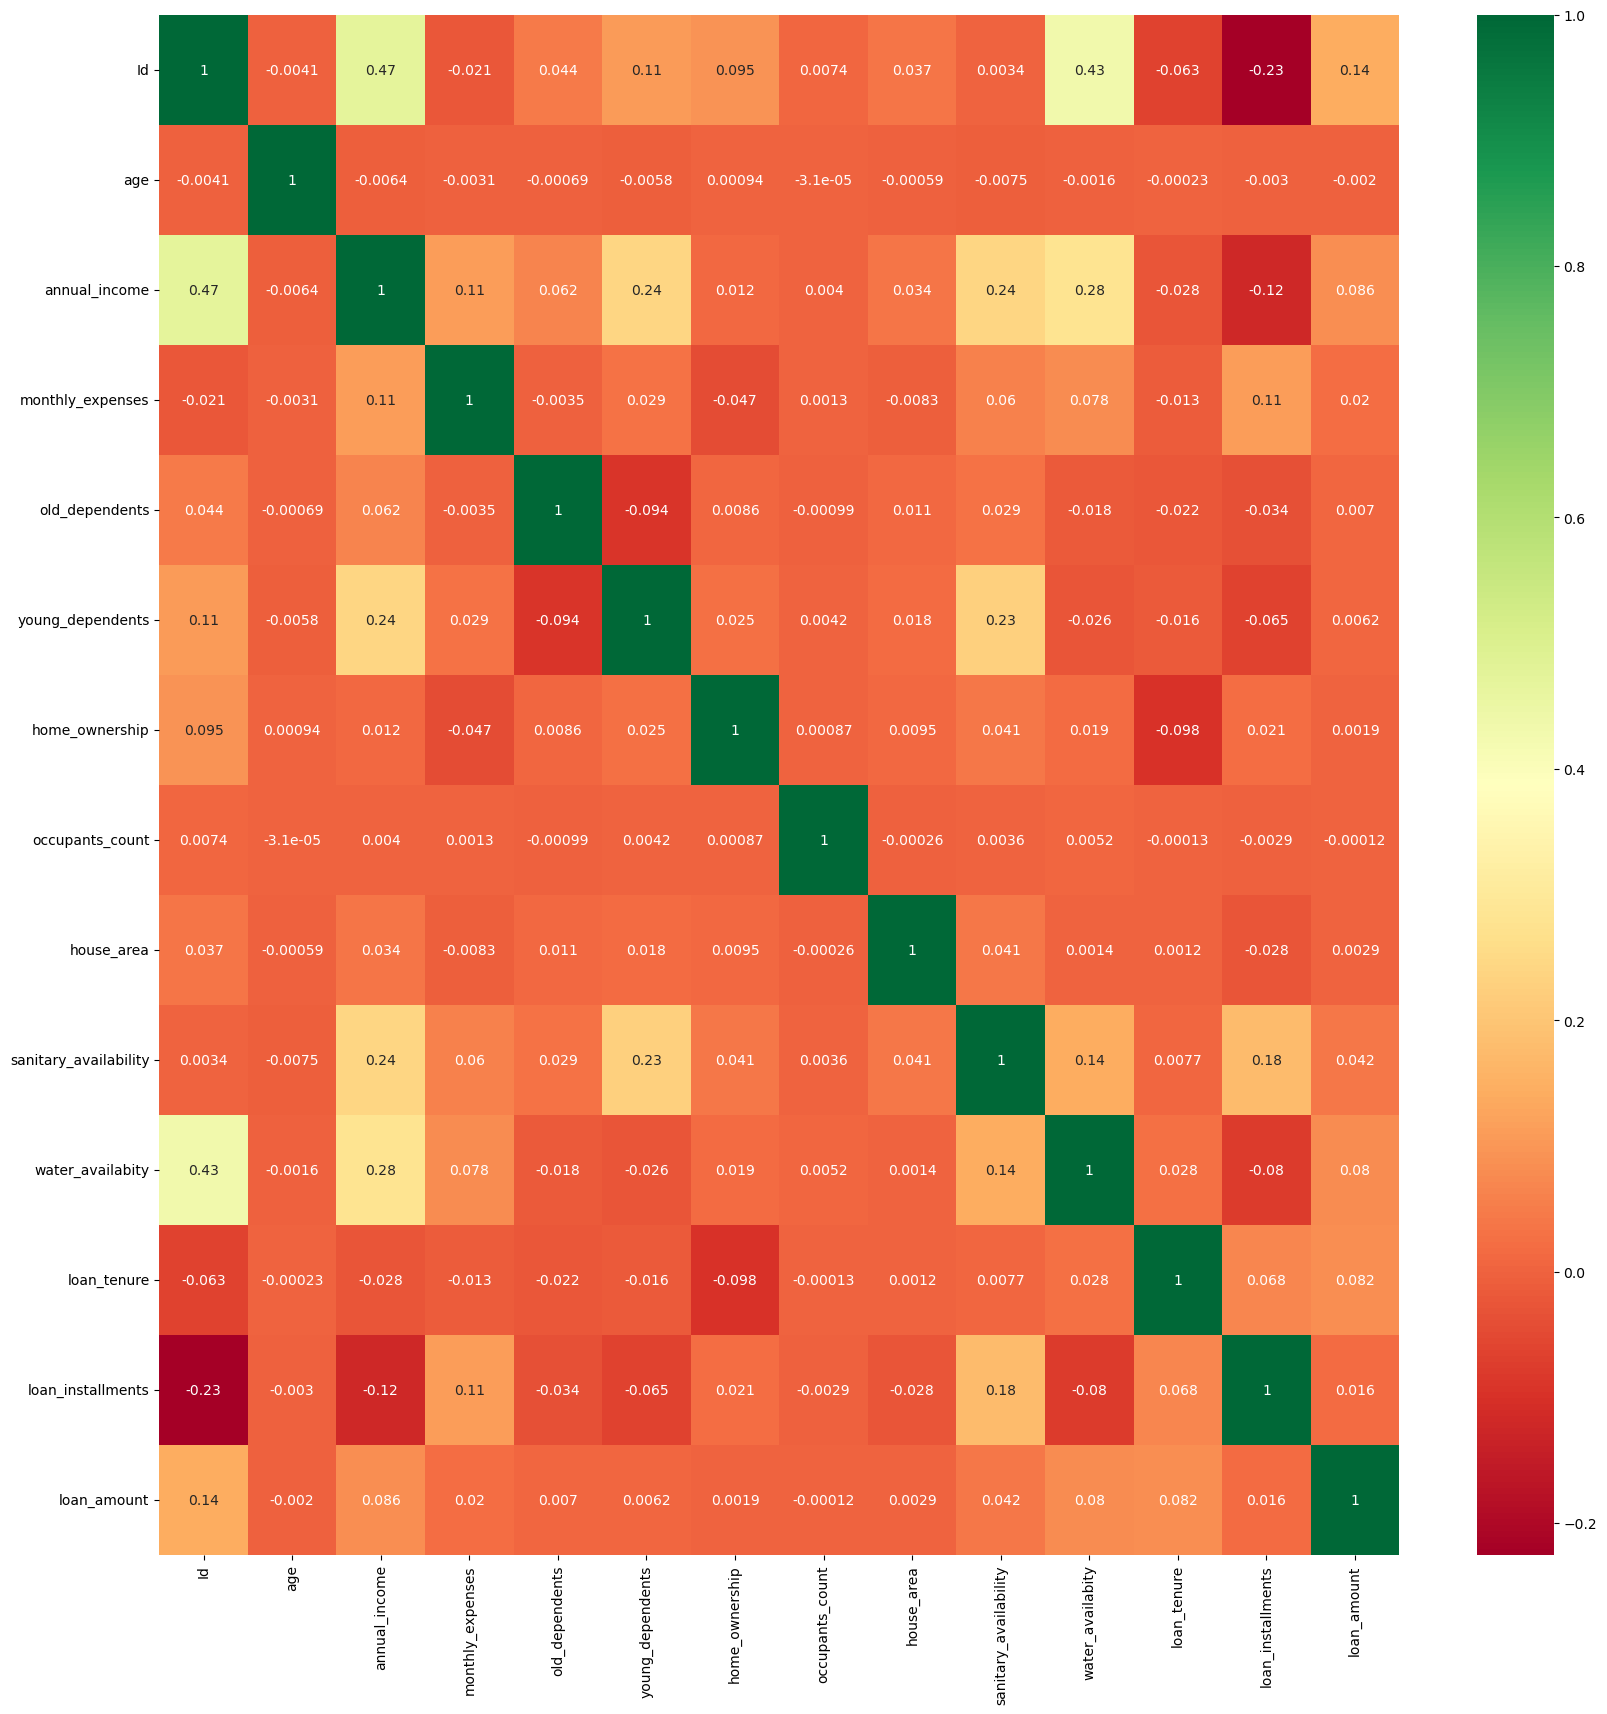

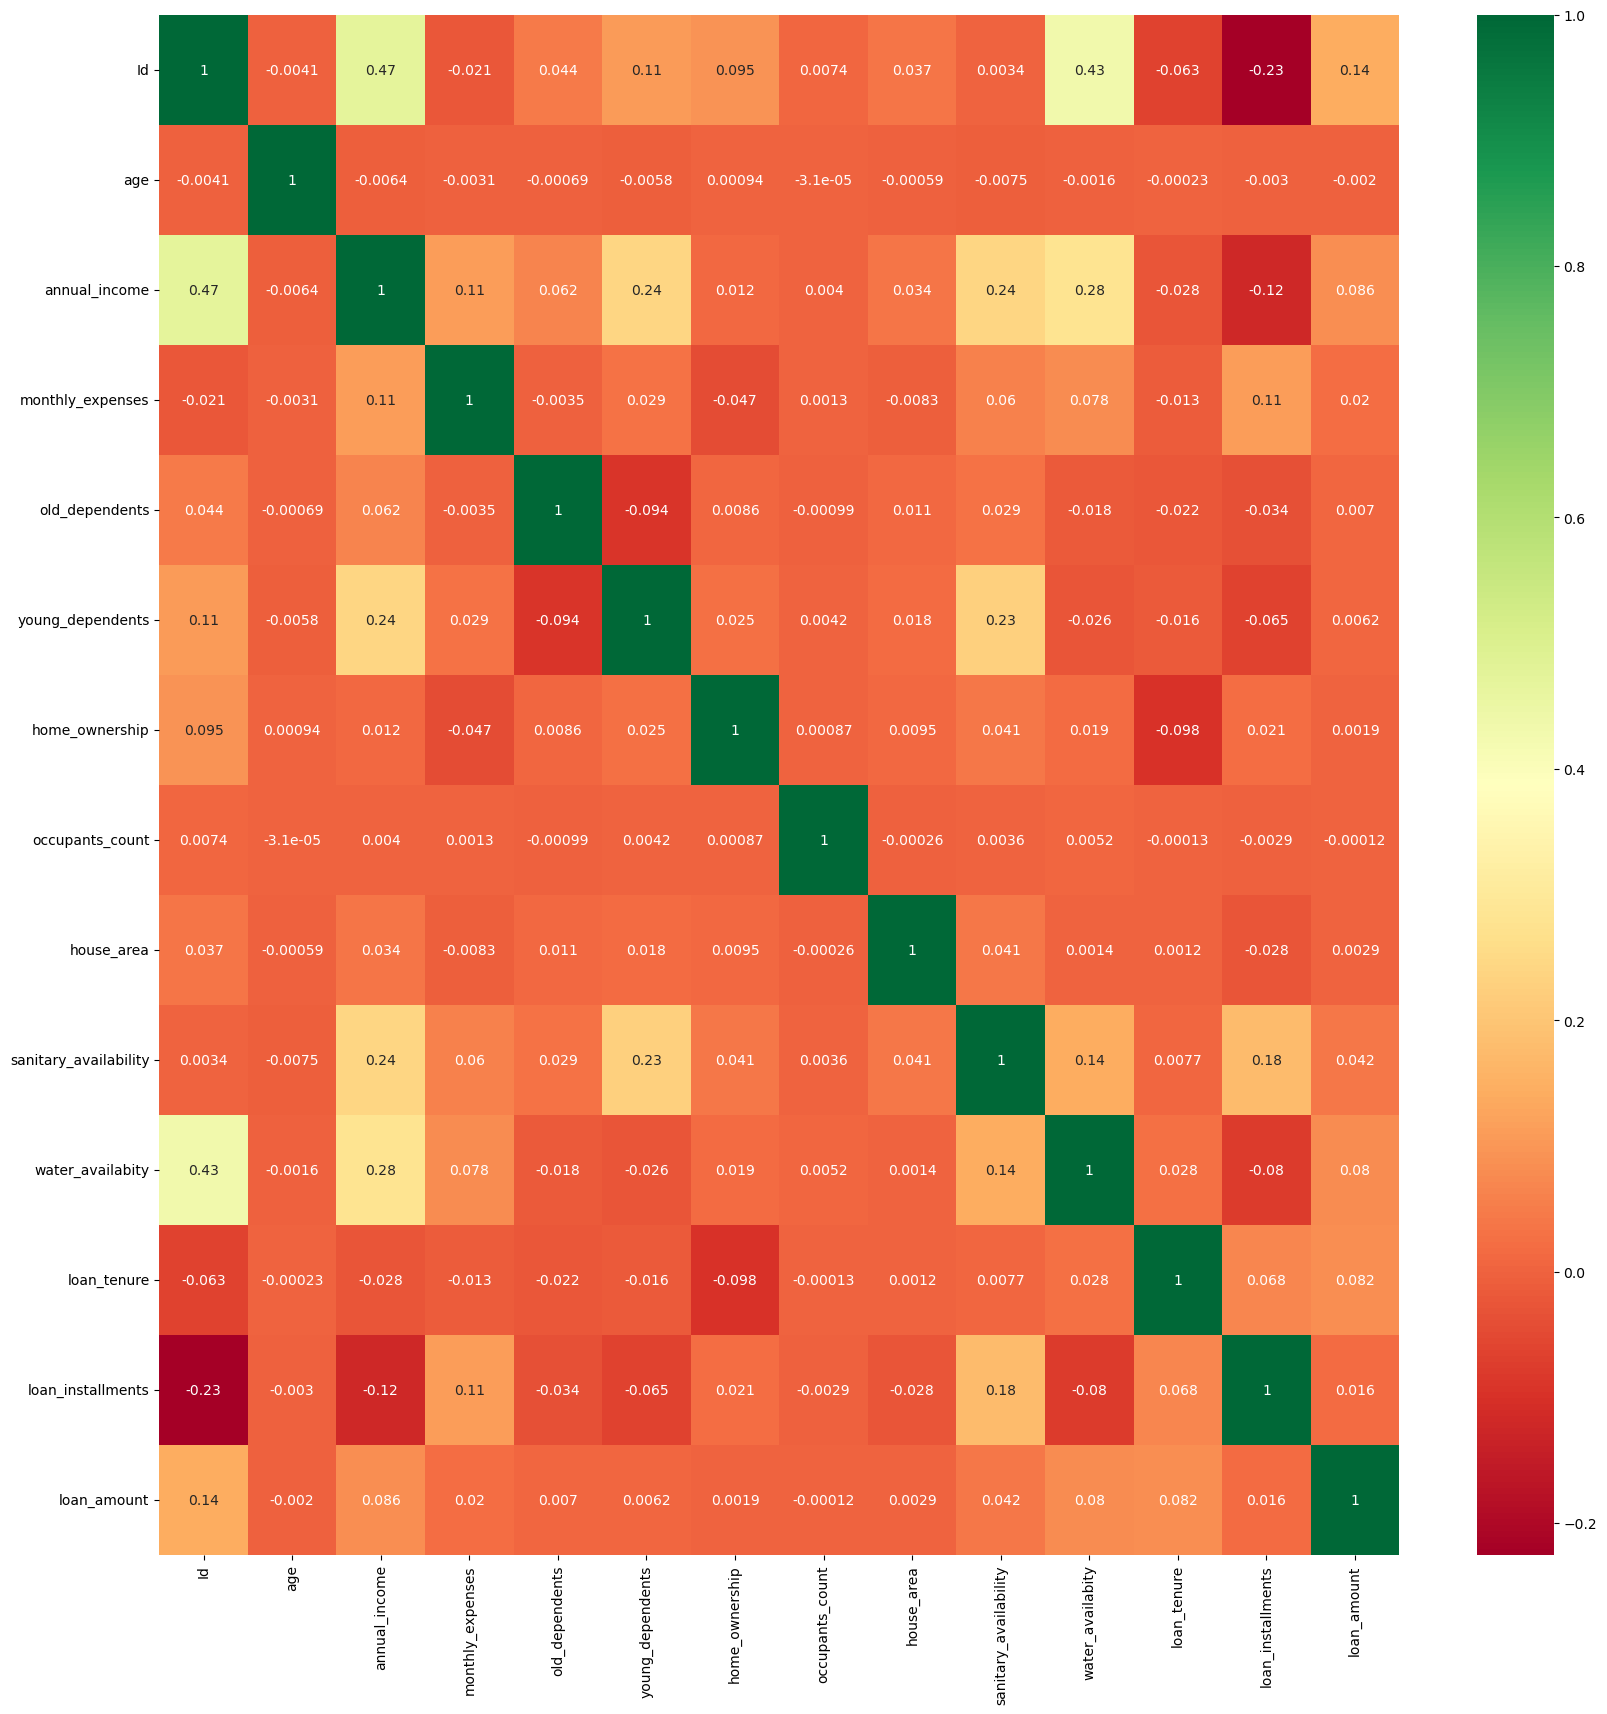

In [13]:
#get correlations of each features in dataset
corrmat = numeric_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(numeric_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

# Exploratory Data Analysis

#  1.Personal Details: city, age, sex, social_class

In [14]:
# Personal Details: city, age, sex, social_class
personal_data=pd.DataFrame(data,columns=["city","age","sex","social_class"])
personal_data.head()

,city,age,sex,social_class
0,Dhanbad,22,F,Mochi
1,Manjapra,21,F,OBC
2,Dhanbad,24,M,Nai
3,NaN,26,F,OBC
4,Nuapada,23,F,OBC


In [15]:
personal_data.describe()

,age
count,40000.00000
mean,55.15990
std,3830.35566
min,2.00000
25%,29.00000
50%,35.00000
75%,42.00000
max,766105.00000


In [16]:
personal_data.isnull().sum()

city            1864
age                0
sex                0
social_class    5255
dtype: int64

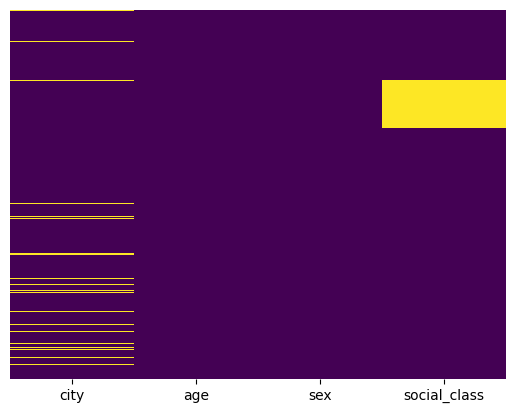

In [18]:
sns.heatmap(personal_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [19]:
personal_data.count()

city            38136
age             40000
sex             40000
social_class    34745
dtype: int64

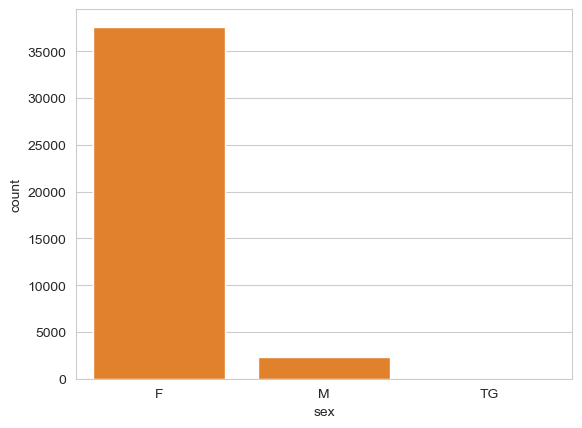

In [21]:
#categorical features
sns.set_style('whitegrid')
sns.countplot(x='sex',data=personal_data)
plt.show()

In [22]:
data1=personal_data[(personal_data['sex']=="M")].count()
data1.head()

city            2193
age             2371
sex             2371
social_class    2278
dtype: int64

In [23]:
data1=personal_data[(personal_data['sex']=="F")].count()
data1.head()

city            35938
age             37622
sex             37622
social_class    32460
dtype: int64

In [24]:
data1=personal_data[(personal_data['sex']=="TG")].count()
data1.head()

city            5
age             7
sex             7
social_class    7
dtype: int64

# 2. Financial Details

In [26]:
#Financial Details: primary_business, secondary_business, annual_income, monthly_expenses,
#old_dependents, young_dependents
financial_details_data=pd.DataFrame(data,columns=["primary_business","secondary_business","annual_income","monthly_expenses",
                                                 "old_dependents","young_dependents"])
financial_details_data.head()

,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents
0,Tailoring,Others,36000.0,5000.0,0,2
1,Tailoring,none,94000.0,3600.0,1,1
2,Beauty salon,Others,48000.0,4000.0,0,2
3,Tailoring,none,7000.0,5000.0,0,2
4,General store,Agriculture,36000.0,3500.0,0,0


In [27]:
financial_details_data.describe()

,annual_income,monthly_expenses,old_dependents,young_dependents
count,4.000000e+04,39880.000000,40000.000000,40000.00000
mean,3.764021e+04,3810.875401,0.044900,1.13710
std,2.873912e+04,4592.958009,0.222003,1.07384
min,0.000000e+00,2.000000,0.000000,0.00000
25%,1.440000e+04,2500.000000,0.000000,0.00000
50%,3.600000e+04,3500.000000,0.000000,1.00000
75%,5.600000e+04,4000.000000,0.000000,2.00000
max,1.200000e+06,240000.000000,3.000000,7.00000


In [28]:
financial_details_data.isnull().sum()

primary_business        26
secondary_business    5241
annual_income            0
monthly_expenses       120
old_dependents           0
young_dependents         0
dtype: int64

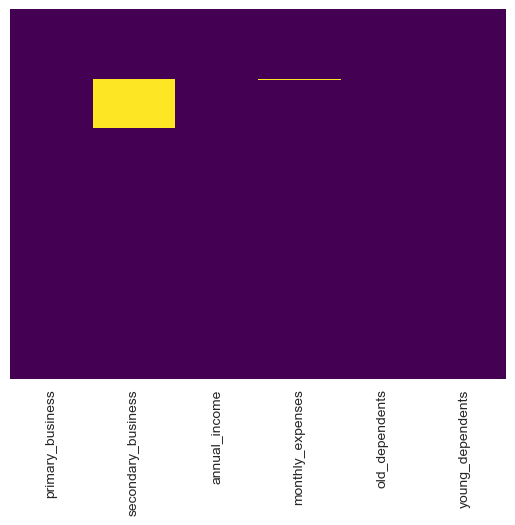

In [30]:
sns.heatmap(financial_details_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [31]:
financial_details_data.count()

primary_business      39974
secondary_business    34759
annual_income         40000
monthly_expenses      39880
old_dependents        40000
young_dependents      40000
dtype: int64

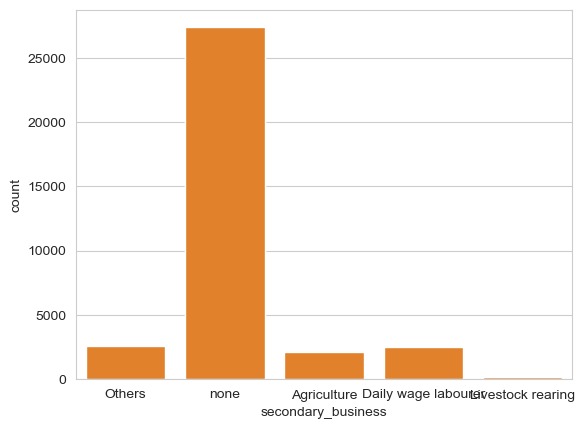

In [33]:
#categorical features
sns.set_style('whitegrid')
sns.countplot(x='secondary_business',data=financial_details_data)
plt.show()

# 3.House Details

In [34]:
#House Details: home_ownership, type_of_house, occupants_count, house_area, sanitary_availability,
#water_availability
house_details_data=pd.DataFrame(data,columns=["home_ownership","type_of_house","occupants_count",
                                             "house_area","sanitary_availability","water_availabity"])
house_details_data.tail()

,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity
39995,1.0,T2,2,600.0,1.0,1.0
39996,1.0,T2,4,800.0,1.0,1.0
39997,1.0,T2,3,600.0,1.0,1.0
39998,1.0,T2,4,600.0,1.0,1.0
39999,1.0,T2,4,600.0,1.0,1.0


In [35]:
house_details_data.describe()

,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity
count,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000
mean,0.972489,26.641000,552.804750,0.686369,0.753216
std,0.163568,4749.995485,4596.921905,0.464028,0.255337
min,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,1.000000,2.000000,200.000000,0.000000,0.500000
50%,1.000000,3.000000,400.000000,1.000000,1.000000
75%,1.000000,4.000000,600.000000,1.000000,1.000000
max,1.000000,950000.000000,700000.000000,1.000000,1.000000


In [37]:
house_details_data.isnull().sum()

home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
dtype: int64

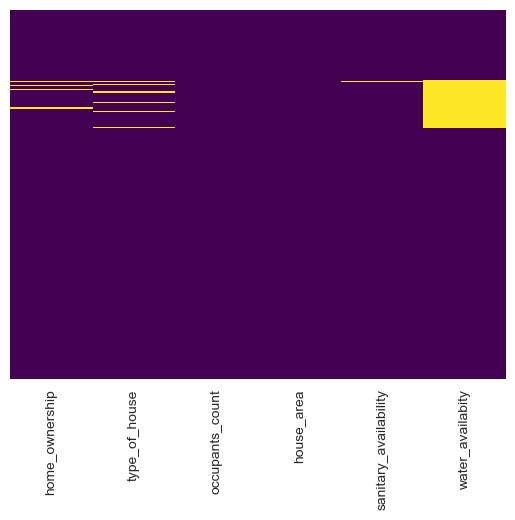

In [39]:
sns.heatmap(house_details_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [40]:
house_details_data.count()

home_ownership           39621
type_of_house            39306
occupants_count          40000
house_area               40000
sanitary_availability    39792
water_availabity         34747
dtype: int64

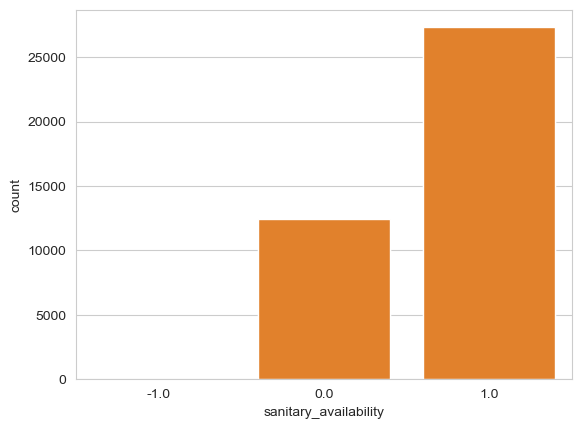

In [42]:
#categorical features
sns.set_style('whitegrid')
sns.countplot(x='sanitary_availability',data=house_details_data)
plt.show()

# 4.Loan Details:

In [43]:
#Loan Details: loan_purpose, loan_tenure, loan_installments, loan_amount 
#(these contain loan details of loans that have been previously given, and which have been repaid)

loan_details_data=pd.DataFrame(data,columns=["loan_purpose","loan_tenure","loan_installments","loan_amount"])
loan_details_data.head()

,loan_purpose,loan_tenure,loan_installments,loan_amount
0,Apparels,12,12,5000.0
1,Apparels,12,50,7500.0
2,Beauty Salon,12,12,5000.0
3,Apparels,12,50,7500.0
4,Retail Store,12,12,5000.0


In [44]:
loan_details_data.describe()

,loan_tenure,loan_installments,loan_amount
count,40000.000000,40000.000000,4.000000e+04
mean,12.032225,21.761175,8.412593e+03
std,1.367473,16.682458,1.359694e+04
min,3.000000,0.000000,1.000000e+02
25%,12.000000,12.000000,5.000000e+03
50%,12.000000,12.000000,8.000000e+03
75%,12.000000,50.000000,1.000000e+04
max,84.000000,84.000000,1.343000e+06


In [45]:
loan_details_data.isnull().sum()

loan_purpose         26
loan_tenure           0
loan_installments     0
loan_amount           0
dtype: int64

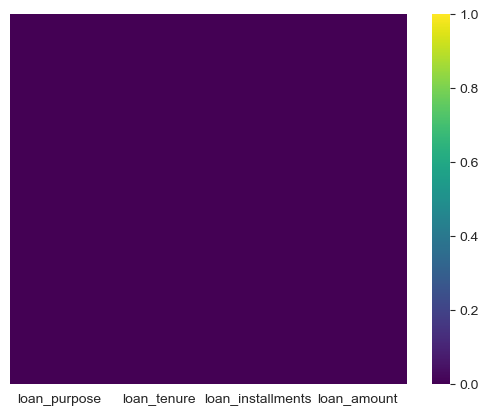

In [52]:
sns.heatmap(loan_details_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [53]:
loan_details_data.count()

loan_purpose         39974
loan_tenure          40000
loan_installments    40000
loan_amount          40000
dtype: int64

# 2.There is a new customer who needs a loan. Which models will be best suited to predict the loan_amount that can be granted to the customer?

Ans: This is a regression problem.Regression models will be best suited to predict the loan_amount that can be granted to the customer.I have used linear regression ,decision tree and Random forest algorithm.

# 3. Build a model to predict the maximum loan_amount that can be granted to the customer. Which all variables are good predictors?

Ans: Good predictors variables are:
* age
* sex
* primary_business
* secondary_business
* annual_income
* monthly_expenses
* old_dependents
* young_dependents
* home_ownership
* type_of_house
* occupants_count
* house_area
* loan_purpose
* loan_tenure
* loan_installments


# Handling Missing value

In [54]:
data.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [55]:
print(f"Number of people with age > 100: {len(personal_data[personal_data['age'] > 100])}")



Number of people with age > 100: 3


In [56]:
print(personal_data[personal_data['age'] > 100])




                city     age sex social_class
9337           Pusad     205   F          NaN
10236    Kendubahara  766105   F          NaN
11993  Vadakkenchery     288   F          NaN


In [71]:

#Since in age features ,we have one record of 205,288 and 766105
#these are some kind of outliers and 788105 are mistyped age value.
#I am dropping these values as we have only 3 records.
data_outlier1=data.loc[data['age']==205]
data_outlier2=data.loc[data['age']==288]
data_outlier3=data.loc[data['age']==766105]

In [72]:
i = data[(data.age ==205)].index
j=data[(data.age==288)].index
k=data[(data.age==766105)].index

In [73]:
#deleting three records
data_updated1=data.drop(i)
data_updated2=data.drop(j)
data_updated2=data.drop(k)

In [74]:
data_updated1.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [85]:
data_updated1.shape

(39999, 21)

In [75]:
data_updated2.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [84]:
data_updated2.shape

(39999, 21)

In [80]:
print(data_updated2[data_updated2['age'].isin([208])])



Empty DataFrame
Columns: [Id, city, age, sex, social_class, primary_business, secondary_business, annual_income, monthly_expenses, old_dependents, young_dependents, home_ownership, type_of_house, occupants_count, house_area, sanitary_availability, water_availabity, loan_purpose, loan_tenure, loan_installments, loan_amount]
Index: []

[0 rows x 21 columns]


In [81]:
data_updated3=data_updated2.copy()

In [78]:
data_updated3.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [83]:
data_updated3.shape

(39999, 21)

In [79]:
print(data_updated3[data_updated3['age'].isin([205, 288, 766105])])


          Id           city  age sex social_class  \
9337    9338          Pusad  205   F          NaN   
11993  11994  Vadakkenchery  288   F          NaN   

                     primary_business secondary_business  annual_income  \
9337                  Provision store                NaN            0.0   
11993  Spices and condiments business                NaN            0.0   

       monthly_expenses  old_dependents  ...  home_ownership  type_of_house  \
9337             3000.0               0  ...             1.0             T2   
11993            3900.0               0  ...             1.0             T1   

      occupants_count  house_area  sanitary_availability  water_availabity  \
9337                0         0.0                    0.0               NaN   
11993               0         0.0                    0.0               NaN   

                loan_purpose loan_tenure  loan_installments  loan_amount  
9337            Retail Store          12                 12       

In [86]:
#Handling missing values with mean and mode
data_updated3['social_class']=data_updated3['social_class'].fillna(data_updated3['social_class'].mode()[0])
data_updated3['city']=data_updated3['city'].fillna(data_updated3['city'].mode()[0])
data_updated3['primary_business']=data_updated3['primary_business'].fillna(data_updated3['primary_business'].mode()[0])
data_updated3['secondary_business']=data_updated3['secondary_business'].fillna(data_updated3['secondary_business'].mode()[0])
data_updated3['type_of_house']=data_updated3['type_of_house'].fillna(data_updated3['type_of_house'].mode()[0])
data_updated3['sanitary_availability']=data_updated3['sanitary_availability'].fillna(data_updated3['sanitary_availability'].mode()[0])                                                      
data_updated3['water_availabity']=data_updated3['water_availabity'].fillna(data_updated3['water_availabity'].mode()[0])
data_updated3['loan_purpose']=data_updated3['loan_purpose'].fillna(data_updated3['loan_purpose'].mode()[0])
data_updated3['monthly_expenses']=data_updated3['monthly_expenses'].fillna(data_updated3['monthly_expenses'].mean())
data_updated3['home_ownership']=data_updated3['home_ownership'].fillna(data_updated3['home_ownership'].mode()[0])

In [87]:
data_updated3.isnull().sum()

Id                       0
city                     0
age                      0
sex                      0
social_class             0
primary_business         0
secondary_business       0
annual_income            0
monthly_expenses         0
old_dependents           0
young_dependents         0
home_ownership           0
type_of_house            0
occupants_count          0
house_area               0
sanitary_availability    0
water_availabity         0
loan_purpose             0
loan_tenure              0
loan_installments        0
loan_amount              0
dtype: int64

In [88]:
data_updated3.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,Pusad,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [89]:
data_updated3.shape

(39999, 21)

In [90]:
X=data_updated3.iloc[:, 1:20]
X.head()

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments
0,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12
1,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50
2,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12
3,Pusad,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50
4,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12


In [91]:
X.shape

(39999, 19)

In [49]:
y=data_updated3.iloc[:,-1] 
y.head()

0    5000.0
1    7500.0
2    5000.0
3    7500.0
4    5000.0
Name: loan_amount, dtype: float64

In [50]:
data_X=pd.DataFrame(data_updated3,columns={"Id","age","sex","annual_income",
                                     "monthly_expenses","old_dependents","young_dependents","home_ownership","type_of_house",
                                     "occupants_count","house_area","loan_tenure","loan_installments"})

In [51]:
data_X.head()

,old_dependents,home_ownership,loan_tenure,annual_income,loan_installments,age,Id,type_of_house,young_dependents,house_area,occupants_count,sex,monthly_expenses
0,0,1.0,12,36000.0,12,22,1,R,2,70.0,4,F,5000.0
1,1,1.0,12,94000.0,50,21,2,T1,1,80.0,4,F,3600.0
2,0,1.0,12,48000.0,12,24,3,T1,2,50.0,4,M,4000.0
3,0,1.0,12,7000.0,50,26,4,T1,2,50.0,5,F,5000.0
4,0,1.0,12,36000.0,12,23,5,T1,0,112.0,1,F,3500.0


In [52]:
data1=pd.DataFrame(data_X,columns={"type_of_house","sex"})
data2= pd.get_dummies(data1.type_of_house,prefix='type_of_house',drop_first=True)

In [53]:
#performing one hot encoding on the feature CourseInstructor
data3 = pd.get_dummies(data1.sex, prefix='sex',drop_first=True)

In [54]:
data6= pd.concat([data2, data3],axis=1)
data6.head()

,type_of_house_T1,type_of_house_T2,sex_M,sex_TG
0,0,0,0,0
1,1,0,0,0
2,1,0,1,0
3,1,0,0,0
4,1,0,0,0


In [55]:
data7= pd.concat([data_X, data6],axis=1)
data7.head()

,old_dependents,home_ownership,loan_tenure,annual_income,loan_installments,age,Id,type_of_house,young_dependents,house_area,occupants_count,sex,monthly_expenses,type_of_house_T1,type_of_house_T2,sex_M,sex_TG
0,0,1.0,12,36000.0,12,22,1,R,2,70.0,4,F,5000.0,0,0,0,0
1,1,1.0,12,94000.0,50,21,2,T1,1,80.0,4,F,3600.0,1,0,0,0
2,0,1.0,12,48000.0,12,24,3,T1,2,50.0,4,M,4000.0,1,0,1,0
3,0,1.0,12,7000.0,50,26,4,T1,2,50.0,5,F,5000.0,1,0,0,0
4,0,1.0,12,36000.0,12,23,5,T1,0,112.0,1,F,3500.0,1,0,0,0


In [56]:
X=pd.DataFrame(data7,columns={"old_dependents","loan_installments","loan_tenure","home_ownership",
                       "young_dependents","monthly_expenses","annual_income","age","house_area","Id",
                       "occupants_count","type_of_house_T1","type_of_house_T2","sex_M","sex_TG"})

In [57]:
X.head()

,home_ownership,old_dependents,loan_tenure,sex_M,annual_income,loan_installments,age,type_of_house_T1,Id,young_dependents,sex_TG,house_area,occupants_count,type_of_house_T2,monthly_expenses
0,1.0,0,12,0,36000.0,12,22,0,1,2,0,70.0,4,0,5000.0
1,1.0,1,12,0,94000.0,50,21,1,2,1,0,80.0,4,0,3600.0
2,1.0,0,12,1,48000.0,12,24,1,3,2,0,50.0,4,0,4000.0
3,1.0,0,12,0,7000.0,50,26,1,4,2,0,50.0,5,0,5000.0
4,1.0,0,12,0,36000.0,12,23,1,5,0,0,112.0,1,0,3500.0


In [58]:
X.shape

(39999, 15)

In [59]:
X.isnull().sum()

home_ownership       0
old_dependents       0
loan_tenure          0
sex_M                0
annual_income        0
loan_installments    0
age                  0
type_of_house_T1     0
Id                   0
young_dependents     0
sex_TG               0
house_area           0
occupants_count      0
type_of_house_T2     0
monthly_expenses     0
dtype: int64

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   home_ownership     39999 non-null  float64
 1   old_dependents     39999 non-null  int64  
 2   loan_tenure        39999 non-null  int64  
 3   sex_M              39999 non-null  uint8  
 4   annual_income      39999 non-null  float64
 5   loan_installments  39999 non-null  int64  
 6   age                39999 non-null  int64  
 7   type_of_house_T1   39999 non-null  uint8  
 8   Id                 39999 non-null  int64  
 9   young_dependents   39999 non-null  int64  
 10  sex_TG             39999 non-null  uint8  
 11  house_area         39999 non-null  float64
 12  occupants_count    39999 non-null  int64  
 13  type_of_house_T2   39999 non-null  uint8  
 14  monthly_expenses   39999 non-null  float64
dtypes: float64(4), int64(7), uint8(4)
memory usage: 3.8 MB


In [61]:
y=pd.DataFrame(data_updated3,columns={"loan_amount"})

In [62]:
y.shape

(39999, 1)

In [63]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

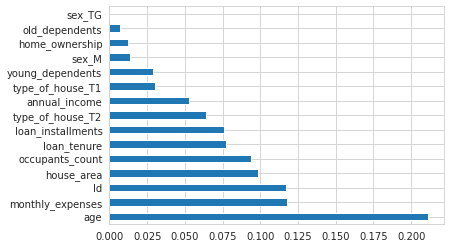

In [64]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

# Linear Regression

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Model Evaluation

In [68]:

prediction=regressor.predict(X_test)

In [69]:
data_prediction=pd.DataFrame(prediction,columns={"Predicted_loan_amount"})
data_prediction.head()

,Predicted_loan_amount
0,6601.258492
1,6055.020392
2,5941.203323
3,5687.549364
4,9737.819776


In [70]:
data_prediction.shape

(12000, 1)

In [71]:
y_test.shape

(12000, 1)

In [72]:
y_test.head()

,loan_amount
12837,5000.0
10914,3000.0
4214,5000.0
8198,2000.0
29127,10000.0


In [73]:
y_test1=y_test.copy()

In [74]:
y_test1=y_test1.reset_index()
y_test2=pd.DataFrame(y_test1,columns={"loan_amount"})
y_test2.head()

,loan_amount
0,5000.0
1,3000.0
2,5000.0
3,2000.0
4,10000.0


In [75]:
df_row_merged = pd.concat([data_prediction,y_test2],axis=1)
df_row_merged.head(10)

,Predicted_loan_amount,loan_amount
0,6601.258492,5000.0
1,6055.020392,3000.0
2,5941.203323,5000.0
3,5687.549364,2000.0
4,9737.819776,10000.0
5,6801.569466,5000.0
6,10726.570871,15000.0
7,6259.577866,7500.0
8,9554.410648,12000.0
9,11046.660947,8000.0


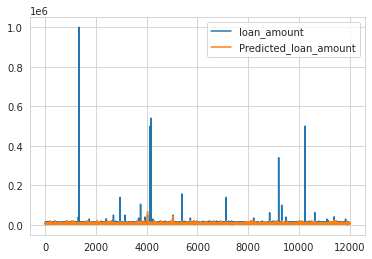

In [76]:
df_row_merged[['loan_amount','Predicted_loan_amount']].plot()

In [77]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2282.450493962997
MSE: 166992843.86178964
RMSE: 12922.571101053754


In [78]:
#df_row_merged_randomforest.head()
df_row_merged['error_rate']=(abs(df_row_merged['loan_amount']-df_row_merged['Predicted_loan_amount'])/df_row_merged['loan_amount'])*100

In [79]:
df_row_merged.head()

,Predicted_loan_amount,loan_amount,error_rate
0,6601.258492,5000.0,32.025170
1,6055.020392,3000.0,101.834013
2,5941.203323,5000.0,18.824066
3,5687.549364,2000.0,184.377468
4,9737.819776,10000.0,2.621802


In [80]:
#mean error rate
linear_mean_error=df_row_merged.error_rate.mean()
#calculating accuracy
mean_accuracy=100-linear_mean_error
mean_accuracy

71.71681090048715

# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
dtree=DecisionTreeRegressor(criterion='mse')
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [83]:
dtreePrediction=dtree.predict(X_test)

In [84]:
dtreePrediction_data=pd.DataFrame(dtreePrediction,columns={"Predicted_loan_amount"})
dtreePrediction_data.head()

,Predicted_loan_amount
0,5000.0
1,3000.0
2,5000.0
3,3000.0
4,10000.0


In [85]:
df_row_merged_dtree = pd.concat([dtreePrediction_data,y_test2],axis=1)
df_row_merged_dtree.head(10)

,Predicted_loan_amount,loan_amount
0,5000.0,5000.0
1,3000.0,3000.0
2,5000.0,5000.0
3,3000.0,2000.0
4,10000.0,10000.0
5,5000.0,5000.0
6,8000.0,15000.0
7,7500.0,7500.0
8,12000.0,12000.0
9,8000.0,8000.0


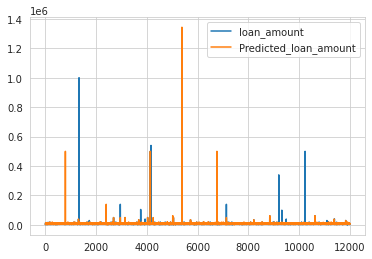

In [86]:
df_row_merged_dtree[['loan_amount','Predicted_loan_amount']].plot()

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test, dtreePrediction))
print('MSE:', metrics.mean_squared_error(y_test, dtreePrediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtreePrediction)))

MAE: 1461.8
MSE: 301073205.0
RMSE: 17351.461177664547


In [88]:
#df_row_merged_randomforest.head()
df_row_merged_dtree['error_rate']=(abs(df_row_merged_dtree['loan_amount']-df_row_merged_dtree['Predicted_loan_amount'])/df_row_merged_dtree['loan_amount'])*100

In [89]:
df_row_merged_dtree.head()

,Predicted_loan_amount,loan_amount,error_rate
0,5000.0,5000.0,0.0
1,3000.0,3000.0,0.0
2,5000.0,5000.0,0.0
3,3000.0,2000.0,50.0
4,10000.0,10000.0,0.0


In [90]:
#mean error rate
dt_mean_error=df_row_merged_dtree.error_rate.mean()
#calculating accuracy
dt_mean_accuracy=100-dt_mean_error
dt_mean_accuracy

85.88092992423886

# RandomForest

In [91]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor()
randomforest.fit(X_train,y_train)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [92]:
randomforest_prediction=randomforest.predict(X_test)

In [93]:
randomforest_prediction_data=pd.DataFrame(randomforest_prediction,columns={"Predicted_loan_amount"})
randomforest_prediction_data.head()

,Predicted_loan_amount
0,5000.0
1,3000.0
2,5000.0
3,3400.0
4,10300.0


In [94]:
df_row_merged_randomforest = pd.concat([randomforest_prediction_data,y_test2],axis=1)
df_row_merged_randomforest.head(10)

,Predicted_loan_amount,loan_amount
0,5000.0,5000.0
1,3000.0,3000.0
2,5000.0,5000.0
3,3400.0,2000.0
4,10300.0,10000.0
5,5750.0,5000.0
6,11300.0,15000.0
7,6000.0,7500.0
8,10600.0,12000.0
9,8000.0,8000.0


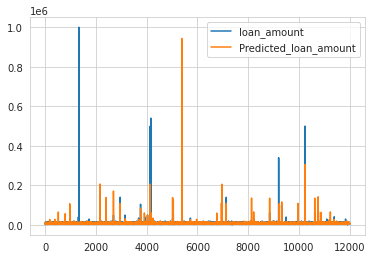

In [95]:
df_row_merged_randomforest[['loan_amount','Predicted_loan_amount']].plot()

In [96]:
print('MAE:', metrics.mean_absolute_error(y_test, randomforest_prediction))
print('MSE:', metrics.mean_squared_error(y_test, randomforest_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, randomforest_prediction)))

MAE: 1399.6141666666667
MSE: 194093830.29166666
RMSE: 13931.756181173523


# Error rate

* (abs(actualvalue-predictedvalue)/actualvalue)*100

In [97]:
#df_row_merged_randomforest.head()
df_row_merged_randomforest['error_rate']=(abs(df_row_merged_randomforest['loan_amount']-df_row_merged_randomforest['Predicted_loan_amount'])/df_row_merged_randomforest['loan_amount'])*100

In [98]:
df_row_merged_randomforest.head()

,Predicted_loan_amount,loan_amount,error_rate
0,5000.0,5000.0,0.0
1,3000.0,3000.0,0.0
2,5000.0,5000.0,0.0
3,3400.0,2000.0,70.0
4,10300.0,10000.0,3.0


In [99]:
#mean error rate
mean_error=df_row_merged_randomforest.error_rate.mean()

In [100]:
#calculating accuracy
accuracy=100-mean_error
accuracy

85.9342357598193

# 5.How will you measure the fitness of the model? Which metrics (accuracy, recall, etc.) are most relevant?

* Since this is a regression problem,MAE,MSE and RMSE can be used to measure the fitness of the model.
* Error rate can also be used to measure the accuracy. The error rate can be calculated by using the following formula:

error_rate=abs((actualvalue-predictedvalue)/actualvalue)*100

mean_error_rate=mean(error_rate)

accuracy=100-mean_error_rate

# 4.Is loan_purpose a significant predictor? The business has insisted on using loan_purpose as a predictor. If it is not already a significant contributor, can we still modify the model to include it?

Ans: Yes,loan_purpose is a significant predictor.Since loan purpose is a categorical variable so we need to perform encoding.Since it has many categories so I have taken top 10 most frequent categories and I have performed one hot encoding on them and for remaining I have kept 0 which is shown below programatically.

In [101]:
# # Performed one-hot encoding on most 10 frequent categories and put 0for remaining.
kdddata=data_updated3.copy()
kdddata1=pd.DataFrame(data_updated3,columns={"loan_purpose"})

In [102]:
kdddata1.head()

,loan_purpose
0,Apparels
1,Apparels
2,Beauty Salon
3,Apparels
4,Retail Store


In [103]:
#Checking the categories in the dataset
for i in kdddata1.columns:
    print(i,":",len(kdddata1[i].unique()),"labels")
kdddata1.loan_purpose.value_counts().sort_values(ascending=False).head(10)


loan_purpose : 37 labels


Apparels                  7090
Agro Based Businesses     4729
Animal husbandry          4421
Meat Businesses           4301
Handicrafts               4230
Farming/ Agriculture      3284
Education Loan            2100
Retail Store              1963
Eateries                  1831
Business Services - II     854
Name: loan_purpose, dtype: int64

In [104]:
#print top 10 features for CourseInstructor_10
loan_purpose_10=kdddata1.loan_purpose.value_counts().sort_values(ascending=False).head(10).index
loan_purpose_10=list(loan_purpose_10)
loan_purpose_10

['Apparels',
 'Agro Based Businesses',
 'Animal husbandry',
 'Meat Businesses',
 'Handicrafts',
 'Farming/ Agriculture',
 'Education Loan',
 'Retail Store',
 'Eateries',
 'Business Services - II']

In [105]:
import numpy as np
for categories in loan_purpose_10:
    kdddata1[categories]=np.where(kdddata1['loan_purpose']==categories,1,0)
kdddata1.head()
kdddata1 = kdddata1.add_suffix('loan_purpose')
kdddata1.head()

,loan_purposeloan_purpose,Apparelsloan_purpose,Agro Based Businessesloan_purpose,Animal husbandryloan_purpose,Meat Businessesloan_purpose,Handicraftsloan_purpose,Farming/ Agricultureloan_purpose,Education Loanloan_purpose,Retail Storeloan_purpose,Eateriesloan_purpose,Business Services - IIloan_purpose
0,Apparels,1,0,0,0,0,0,0,0,0,0
1,Apparels,1,0,0,0,0,0,0,0,0,0
2,Beauty Salon,0,0,0,0,0,0,0,0,0,0
3,Apparels,1,0,0,0,0,0,0,0,0,0
4,Retail Store,0,0,0,0,0,0,0,1,0,0


In [106]:
kdddata1.shape

(39999, 11)

In [107]:
kdddata_new=kdddata1.iloc[:,1:11]
kdddata_new.head()

,Apparelsloan_purpose,Agro Based Businessesloan_purpose,Animal husbandryloan_purpose,Meat Businessesloan_purpose,Handicraftsloan_purpose,Farming/ Agricultureloan_purpose,Education Loanloan_purpose,Retail Storeloan_purpose,Eateriesloan_purpose,Business Services - IIloan_purpose
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0


In [108]:
X_new=pd.concat([X, kdddata_new],axis=1)
X_new.head()

,home_ownership,old_dependents,loan_tenure,sex_M,annual_income,loan_installments,age,type_of_house_T1,Id,young_dependents,...,Apparelsloan_purpose,Agro Based Businessesloan_purpose,Animal husbandryloan_purpose,Meat Businessesloan_purpose,Handicraftsloan_purpose,Farming/ Agricultureloan_purpose,Education Loanloan_purpose,Retail Storeloan_purpose,Eateriesloan_purpose,Business Services - IIloan_purpose
0,1.0,0,12,0,36000.0,12,22,0,1,2,...,1,0,0,0,0,0,0,0,0,0
1,1.0,1,12,0,94000.0,50,21,1,2,1,...,1,0,0,0,0,0,0,0,0,0
2,1.0,0,12,1,48000.0,12,24,1,3,2,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,12,0,7000.0,50,26,1,4,2,...,1,0,0,0,0,0,0,0,0,0
4,1.0,0,12,0,36000.0,12,23,1,5,0,...,0,0,0,0,0,0,0,1,0,0


In [109]:
y.head()

,loan_amount
0,5000.0
1,7500.0
2,5000.0
3,7500.0
4,5000.0


In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new, y, test_size=0.3, random_state=0)

In [112]:
regressor1=LinearRegression()
regressor1.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
regression_kdd_prediction=regressor1.predict(X_test1)

In [114]:
kdd_data_prediction=pd.DataFrame(regression_kdd_prediction,columns={"Predicted_loan_amount"})
kdd_data_prediction.head()

,Predicted_loan_amount
0,6449.724013
1,5152.567040
2,6078.641439
3,7372.894904
4,9433.595779


In [115]:
y_test1=y_test.copy()

In [116]:
y_test1=y_test1.reset_index()
y_test2=pd.DataFrame(y_test1,columns={"loan_amount"})
y_test2.head()

,loan_amount
0,5000.0
1,3000.0
2,5000.0
3,2000.0
4,10000.0


In [117]:
df_row_merged_kdd = pd.concat([kdd_data_prediction,y_test2],axis=1)
df_row_merged_kdd.head(10)

,Predicted_loan_amount,loan_amount
0,6449.724013,5000.0
1,5152.567040,3000.0
2,6078.641439,5000.0
3,7372.894904,2000.0
4,9433.595779,10000.0
5,7170.952660,5000.0
6,11983.695919,15000.0
7,6488.275709,7500.0
8,9172.326787,12000.0
9,11359.693136,8000.0


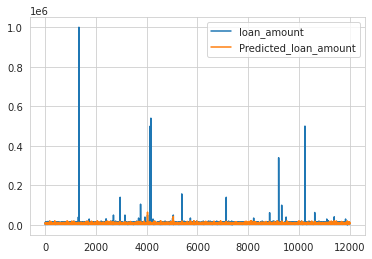

In [118]:
df_row_merged_kdd[['loan_amount','Predicted_loan_amount']].plot()

In [119]:
y_test3=pd.DataFrame(y_test1,columns={"loan_amount"})

In [120]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test3, regression_kdd_prediction))
print('MSE:', metrics.mean_squared_error(y_test3, regression_kdd_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, regression_kdd_prediction)))

MAE: 2301.3897858142473
MSE: 166813299.7321356
RMSE: 12915.622313002792


In [121]:
#df_row_merged_randomforest.head()
df_row_merged_kdd['error_rate']=(abs(df_row_merged_kdd['loan_amount']-df_row_merged_kdd['Predicted_loan_amount'])/df_row_merged_kdd['loan_amount'])*100

In [122]:
#mean error rate
linear_mean_errorkdd=df_row_merged_kdd.error_rate.mean()
#calculating accuracy
mean_accuracykdd=100-linear_mean_errorkdd
mean_accuracykdd

71.33307463847575

# Decision Tree

In [123]:
dtree_kdd=DecisionTreeRegressor(criterion='mse')
dtree_kdd.fit(X_train1,y_train1)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [124]:
dtreePrediction_kdd=dtree_kdd.predict(X_test1)

In [125]:
dtreePrediction_data_kdd=pd.DataFrame(dtreePrediction_kdd,columns={"Predicted_loan_amount"})
dtreePrediction_data_kdd.head()

,Predicted_loan_amount
0,5000.0
1,3000.0
2,5000.0
3,3000.0
4,10000.0


In [126]:
df_row_merged_dtree_kdd = pd.concat([dtreePrediction_data,y_test2],axis=1)
df_row_merged_dtree_kdd.head(10)

,Predicted_loan_amount,loan_amount
0,5000.0,5000.0
1,3000.0,3000.0
2,5000.0,5000.0
3,3000.0,2000.0
4,10000.0,10000.0
5,5000.0,5000.0
6,8000.0,15000.0
7,7500.0,7500.0
8,12000.0,12000.0
9,8000.0,8000.0


In [127]:
y_test2.head()

,loan_amount
0,5000.0
1,3000.0
2,5000.0
3,2000.0
4,10000.0


In [128]:
print('MAE:', metrics.mean_absolute_error(y_test3, dtreePrediction_kdd))
print('MSE:', metrics.mean_squared_error(y_test3, dtreePrediction_kdd))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, dtreePrediction_kdd)))

MAE: 1434.7666666666667
MSE: 291937941.6666667
RMSE: 17086.191549513504


In [129]:
#df_row_merged_randomforest.head()
df_row_merged_dtree_kdd['error_rate']=(abs(df_row_merged_dtree_kdd['loan_amount']-df_row_merged_dtree_kdd['Predicted_loan_amount'])/df_row_merged_dtree_kdd['loan_amount'])*100

In [130]:
#mean error rate
dt_mean_error_kdd=df_row_merged_dtree_kdd.error_rate.mean()
#calculating accuracy
dt_mean_accuracy_kdd=100-dt_mean_error_kdd
dt_mean_accuracy_kdd

85.88092992423886

# RandomForest

In [131]:
randomforest_kdd=RandomForestRegressor()
randomforest_kdd.fit(X_train1,y_train1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [132]:
randomforest_prediction_kdd=randomforest_kdd.predict(X_test1)

In [133]:
randomforest_prediction_data_kdd=pd.DataFrame(randomforest_prediction_kdd,columns={"Predicted_loan_amount"})
randomforest_prediction_data_kdd.head()

,Predicted_loan_amount
0,5000.0
1,3000.0
2,5000.0
3,3600.0
4,10400.0


In [134]:
df_row_merged_randomforest_kdd = pd.concat([randomforest_prediction_data_kdd,y_test2],axis=1)
df_row_merged_randomforest_kdd.head(10)

,Predicted_loan_amount,loan_amount
0,5000.0,5000.0
1,3000.0,3000.0
2,5000.0,5000.0
3,3600.0,2000.0
4,10400.0,10000.0
5,6000.0,5000.0
6,10300.0,15000.0
7,6000.0,7500.0
8,10600.0,12000.0
9,8700.0,8000.0


In [135]:
print('MAE:', metrics.mean_absolute_error(y_test3, randomforest_prediction_data_kdd))
print('MSE:', metrics.mean_squared_error(y_test3, randomforest_prediction_data_kdd))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, randomforest_prediction_data_kdd)))

MAE: 1387.4475
MSE: 188471392.675
RMSE: 13728.488360886642


In [136]:
#df_row_merged_randomforest.head()
df_row_merged_randomforest_kdd['error_rate']=(abs(df_row_merged_randomforest_kdd['loan_amount']-df_row_merged_randomforest_kdd['Predicted_loan_amount'])/df_row_merged_randomforest_kdd['loan_amount'])*100

In [137]:
#mean error rate
rf_mean_error_kdd=df_row_merged_randomforest_kdd.error_rate.mean()

In [138]:
#calculating accuracy
rf_accuracy_kdd=100-rf_mean_error_kdd
rf_accuracy_kdd

85.64357396857311

In [139]:
y_test.head()

,loan_amount
12837,5000.0
10914,3000.0
4214,5000.0
8198,2000.0
29127,10000.0


In [140]:
randomforest_prediction_data_kdd.head()

,Predicted_loan_amount
0,5000.0
1,3000.0
2,5000.0
3,3600.0
4,10400.0
